# Steps for Building a Machine Learning Model

## Selecting Data for Modeling - NYC Airbnb Price Prediction

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame.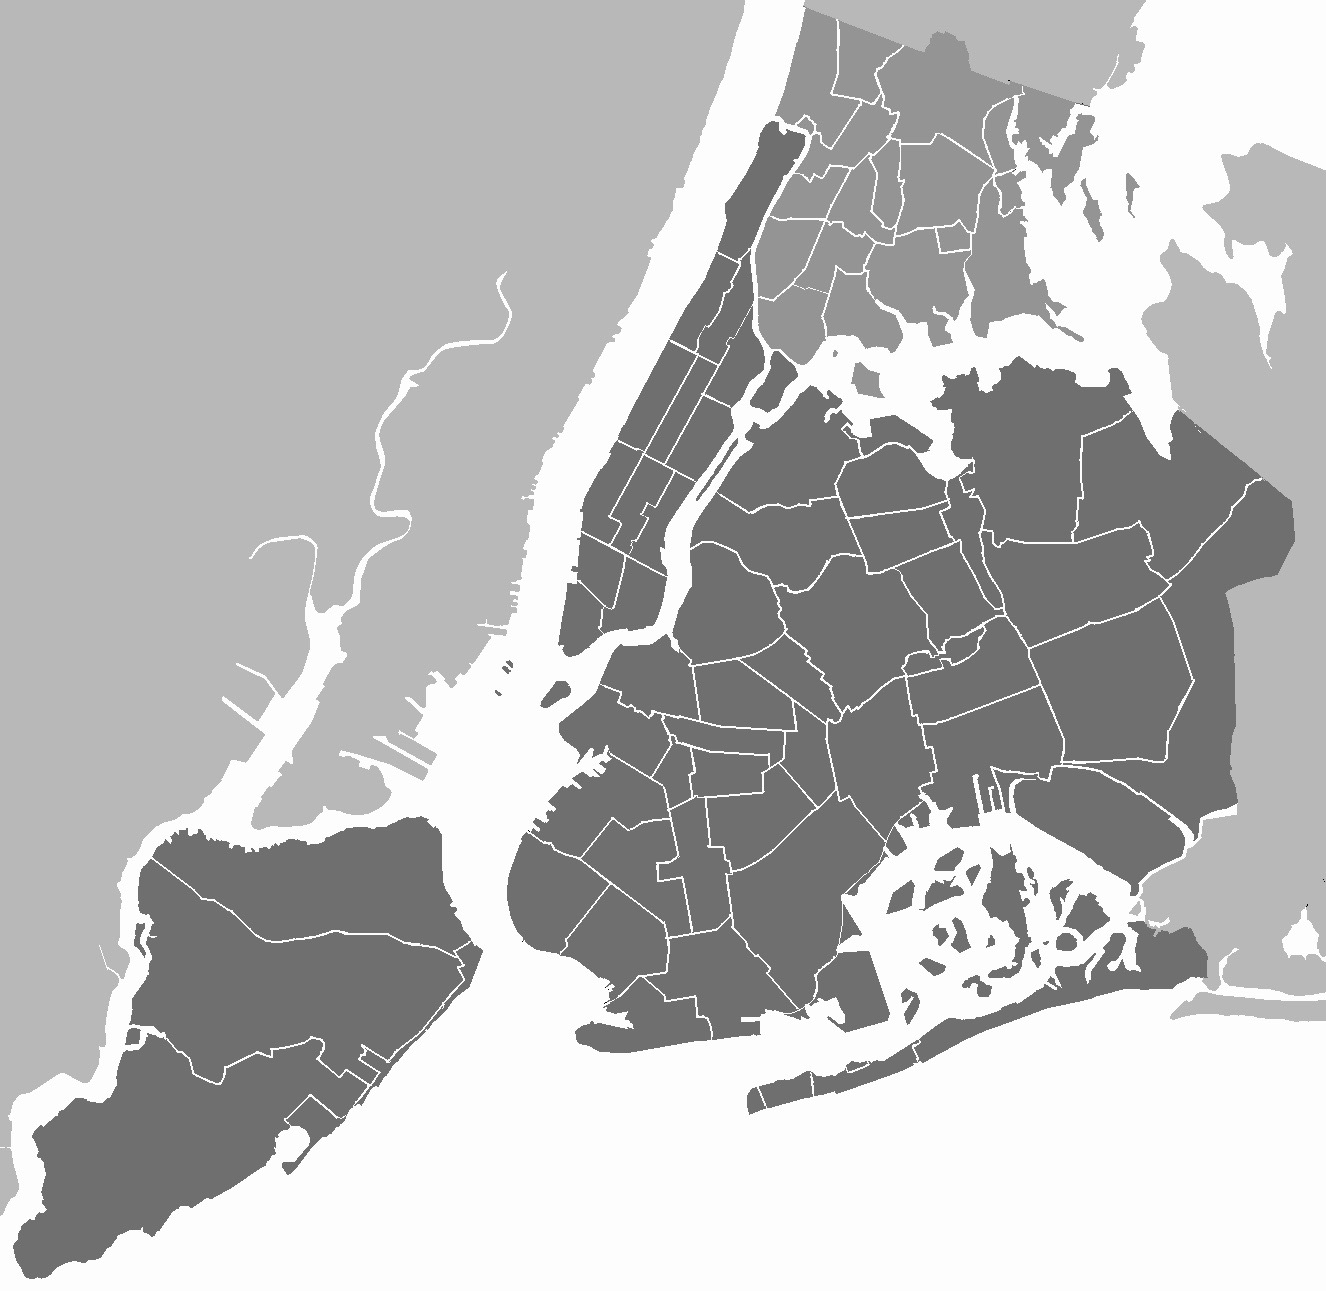

In [14]:
# Import data to a Pandas DataFrame

import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

datafile_path = 'data\Airbnb_NYC_2019.csv'

nyc_airbnb_data = pd.read_csv(datafile_path) 
nyc_airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'NeighnourGroup', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'Room', 'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [15]:
# Remove data with null values (na -> not available)

nyc_airbnb_data = nyc_airbnb_data.dropna(axis=0)
nyc_airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,NeighnourGroup,neighbourhood,latitude,longitude,room_type,Room,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,1,Kensington,40.65,-73.97,Private room,1,149,1,9,19-10-18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,2,Midtown,40.75,-73.98,Entire home/apt,2,225,1,45,21-05-19,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,1,Clinton Hill,40.69,-73.96,Entire home/apt,2,89,1,270,05-07-19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,2,East Harlem,40.80,-73.94,Entire home/apt,2,80,10,9,19-11-18,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,2,Murray Hill,40.75,-73.98,Entire home/apt,2,200,3,74,22-06-19,0.59,1,129


## Identifying The Prediction Target

You can pull out a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

In [16]:
y = nyc_airbnb_data.price

## Choosing "Features"
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

In [17]:
nyc_airbnb_features = ['host_id', 'NeighnourGroup', 'latitude', 'longitude', 'Room',
                       'reviews_per_month']

X = nyc_airbnb_data[nyc_airbnb_features]

X.describe()
#X.head()

,host_id,NeighnourGroup,latitude,longitude,Room,reviews_per_month
count,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,6.424582e+07,1.858891,40.728143,-73.951111,1.567038,1.373229
std,7.589752e+07,0.984881,0.055033,0.046799,0.537678,1.680328
min,2.438000e+03,1.000000,40.510000,-74.240000,1.000000,0.010000
25%,7.029525e+06,1.000000,40.690000,-73.980000,1.000000,0.190000
50%,2.837092e+07,2.000000,40.720000,-73.950000,2.000000,0.720000
75%,1.018905e+08,2.000000,40.760000,-73.940000,2.000000,2.020000
max,2.738417e+08,5.000000,40.910000,-73.710000,3.000000,58.500000


## Building a Decision Tree Model
Defining a decision tree model with scikit-learn (sklearn) and fitting it with the features and target variable.

Steps - Define, Fit, Predict, Evaluate

In [19]:
# Fit model to make predictions

# Define model. Specify a number for random_state to ensure same results each run
#nyc_airbnb_model = DecisionTreeRegressor(random_state=1)
nyc_airbnb_model = RandomForestRegressor(random_state=1)

# Fit model
nyc_airbnb_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [20]:
# Make Predictions for first few rows
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(nyc_airbnb_model.predict(X.head()))

Making predictions for the following 5 houses:
   host_id  NeighnourGroup  latitude  longitude  Room  reviews_per_month
0     2787               1     40.65     -73.97     1               0.21
1     2845               2     40.75     -73.98     2               0.38
3     4869               1     40.69     -73.96     2               4.64
4     7192               2     40.80     -73.94     2               0.10
5     7322               2     40.75     -73.98     2               0.59
The predictions are
[108.6 345.5 137.4 107.  368. ]


## Model Validation
The relevant measure of model quality is predictive accuracy.

Metrics
- Mean Absolute Error(MAE) - Error = Actual - Predicted
With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors.

In [21]:
predicted_prices = nyc_airbnb_model.predict(X)
print(mean_absolute_error(y, predicted_prices)) #In-Sample score; same data used to build and eveluate model

25.038939681089744


In [36]:
# Split Training and Validation datasets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

print(val_y.head())

# Define model
#melbourne_model = DecisionTreeRegressor(max_leaf_nodes=20, random_state = 1)
melbourne_model = RandomForestRegressor(max_leaf_nodes=20, random_state = 1)

# Fit model
melbourne_model.fit(train_X, train_y)
#melbourne_model.fit(X, y)

# get predicted prices on validation data
predictions = melbourne_model.predict(val_X.head())
print(predictions)
print(mean_absolute_error(val_y.head(), predictions))

14447    225
16319     60
37999    170
21406     75
38055     28
Name: price, dtype: int64
[227.11229585  72.04653016 146.27274398  72.04653016  72.04653016]
16.977216405694634


## Experimenting With Different Models
- Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.

We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

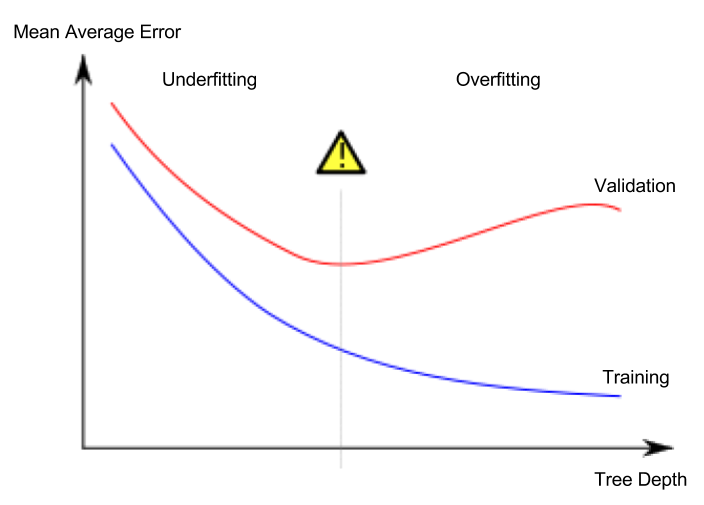

In [38]:
def get_mae(myModel, max_leaf_nodes, train_X, val_X, train_y, val_y):
    if myModel == 'dtree':
        model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    else:
        model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
candidate_max_leaf_nodes = [16,18,20,22,24,30]

for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae_DT = get_mae('dTree', max_leaf_nodes, train_X, val_X, train_y, val_y)
    my_mae_RF = get_mae('rForest', max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t MAE Tree:  %f   \t\t MAE Forest:  %f" %(max_leaf_nodes, my_mae_DT, my_mae_RF))
    
scores = {leaf_size: get_mae('dTree', leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)

print('\n*** BEST TREE SIZE == ' + str(best_tree_size))

Max leaf nodes: 16  		 MAE Tree:  58.606154   		 MAE Forest:  58.606154
Max leaf nodes: 18  		 MAE Tree:  58.581520   		 MAE Forest:  58.581520
Max leaf nodes: 20  		 MAE Tree:  58.809187   		 MAE Forest:  58.809187
Max leaf nodes: 22  		 MAE Tree:  58.827407   		 MAE Forest:  58.827407
Max leaf nodes: 24  		 MAE Tree:  58.778142   		 MAE Forest:  58.778142
Max leaf nodes: 30  		 MAE Tree:  58.492822   		 MAE Forest:  58.492822

*** BEST TREE SIZE == 30


# Building a Random Forest Model

In [41]:
forest_model = RandomForestRegressor(max_leaf_nodes=20, random_state=0)
forest_model.fit(train_X, train_y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=20,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
melb_preds = forest_model.predict(val_X)

print(mean_absolute_error(val_y, melb_preds))

58.29918376597213
